# Chapter 11. The Lambert Problem
## Action by Juanita A. Agudelo-Quiceno, University of Antioquia

In this notebook we will present theory from the Lambert Problem related to mechanical orbits and some mathematical and numerical results which are interested for the theory.

For details on the theory please refer directly to the book:

> Prussing, J. E., & Conway, B. A. (1993). Orbital Mechanics. Oxford university press.

 ## Section 11.1: Introduction

The Lamber's problem tries to find an orbit from two positions and time of flight that separates them, this is a fundamental problem in astrodynamics. If we wanted a spacecraft to travel from one point in the space to another target point, for example, a planet or a space station, We would have to calculate the orbit in which the spacecraft has to move to reach its goal and the time it takes to get from one point to another. The spacecraft could intercept the target, that is, find a point where both bodies meet, without the need for the speeds of the bodies to be equal. Or we can make the spacecraft and the target meet at the same point at the same speed.





links that help me: 
- https://www.spacecraftresearch.com/generalized-orbit-rendezvous
- https://en.wikipedia.org/wiki/Space_rendezvous
- https://www.youtube.com/watch?v=ULRXJsiFMjo
- https://mappingignorance.org/2021/03/24/homa-a-space-orbit-simulator/


In [34]:
import rebound as rb
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
import numpy as np
from matplotlib import animation
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as im


In [5]:
sim = rb.Simulation()
sim.units = ["km","kg","s"]
sim.add(m=5.9e24)
sim.add(m=0, a=6.7, e=6.13e-3)

In [6]:
r_soyuz = np.array(sim.particles[1].xyz) + 0.001
v_soyuz = sim.particles[1].vxyz

delta_v = 20
v_soyuz[0], v_soyuz[1] = v_soyuz[0] + delta_v, v_soyuz[1] + delta_v

sim.add(m=0, x=r_soyuz[0], y=r_soyuz[1], z=r_soyuz[2], vx=v_soyuz[0], vy=v_soyuz[1], vz=v_soyuz[2])

In [7]:
Nt = 200
steps = np.linspace(0, 5, Nt)
r_iss = np.zeros((Nt+1, 3))
r_soyuz = np.zeros((Nt+1, 3))
r_earth = np.zeros((Nt+1, 3))

r_iss[0] = sim.particles[1].xyz
r_soyuz[0] = sim.particles[2].xyz
r_earth[0] = sim.particles[0].xyz

for i, step in enumerate(steps):
    sim.integrate(-step)
    r_earth[i+1] = sim.particles[0].xyz
    r_iss[i+1] = sim.particles[1].xyz
    r_soyuz[i+1] = sim.particles[2].xyz

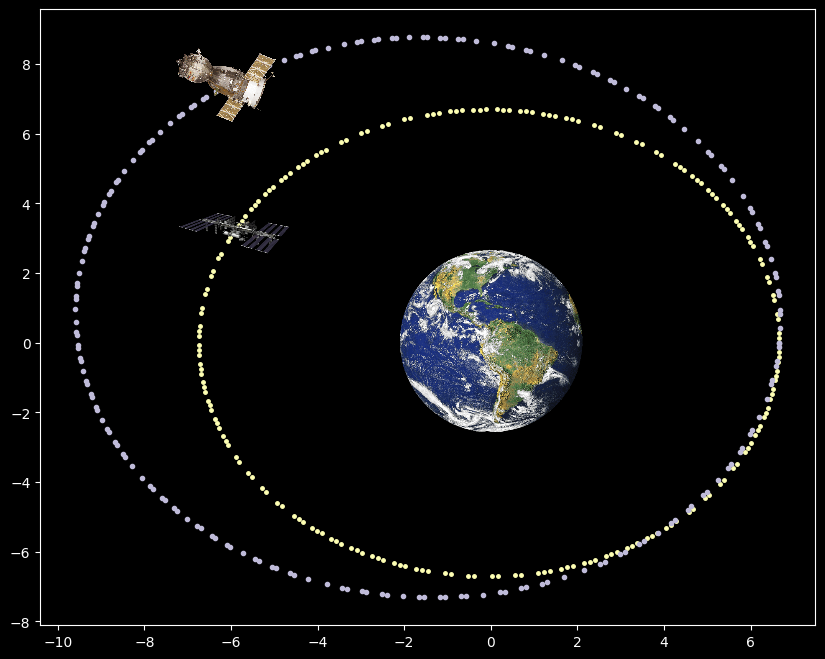

In [33]:
plt.style.use('dark_background')

fig,ax=plt.subplots(figsize=(10,8))

earth = im.imread('earth.png')
Iss = im.imread('ISS.png')
Spyuz = im.imread('Soyuz.png')

imagebox1 = OffsetImage(earth, zoom = 0.3)
imagebox2 = OffsetImage(Iss, zoom = 0.2)
imagebox3 = OffsetImage(Spyuz, zoom = 0.03)

ab1 = AnnotationBbox(imagebox1, (r_earth[:,0][0], r_earth[:,1][0]), frameon = False)
ab2 = AnnotationBbox(imagebox2, (r_iss[:,0][5],r_iss[:,1][5]), frameon = False)
ab3 = AnnotationBbox(imagebox3, (r_soyuz[:,0][7], r_soyuz[:,1][7]), frameon = False)

ax.plot(r_earth[:,0], r_earth[:,1], '.', markersize=10)
ax.plot(r_iss[:,0], r_iss[:,1], '.', markersize=5)
ax.plot(r_soyuz[:,0], r_soyuz[:,1], '.')
ax.add_artist(ab1)
ax.add_artist(ab2)
ax.add_artist(ab3)


In [38]:
#animacion
fig,ax=plt.subplots()

punto1,=ax.plot([],[],'r*')
punto2,=ax.plot([],[],'bo')
punto3,=ax.plot([],[],'go')

ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_aspect("equal")

def pone_puntos(it):
  punto1.set_data(r_earth[1:10,0][-it],r_earth[1:10,1][-it])
  punto2.set_data(r_iss[1:10,0][-it],r_iss[1:10,1][-it])
  punto3.set_data(r_soyuz[1:10,0][-it],r_soyuz[1:10,1][-it])
  return punto1, punto2, punto3


plt.close(fig)
anim=animation.FuncAnimation(fig,pone_puntos,frames=9,interval=200)
HTML(anim.to_html5_video())

buscar: MC-CuadernoClase-UnidadesCanonicas.ipynb
MC-CuadernoClase-SolucionEcuacionKepler.ipynb
MC-CuadernoClase-AnomaliasConicas.ipynb
MC-CuadernoClase-NcuerposAnimado.ipynb
https://es.wikipedia.org/wiki/Soyuz_TMA-14
https://es.wikipedia.org/wiki/Anousheh_Ansari
https://rebound.readthedocs.io/en/latest/integrators/

 ## Section 11.2: Transer Orbits Between Specified Points 

 ## Section 11.3: Lambert's Theorem 

 ## Section 11.4: Properties of the solutions to Lambert's Equation